In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from windrose import WindroseAxes
import os

# Load each country’s cleaned CSV 

In [11]:
benin = pd.read_csv("../data/benin_clean.csv")
sierra_leone = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")

# Add country column for identification
benin["Country"] = "Benin"
sierra_leone["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

# combined the dataframes 
df = pd.concat([benin, sierra_leone, togo], ignore_index=True)

#  Boxplots of GHI, DNI, DHI

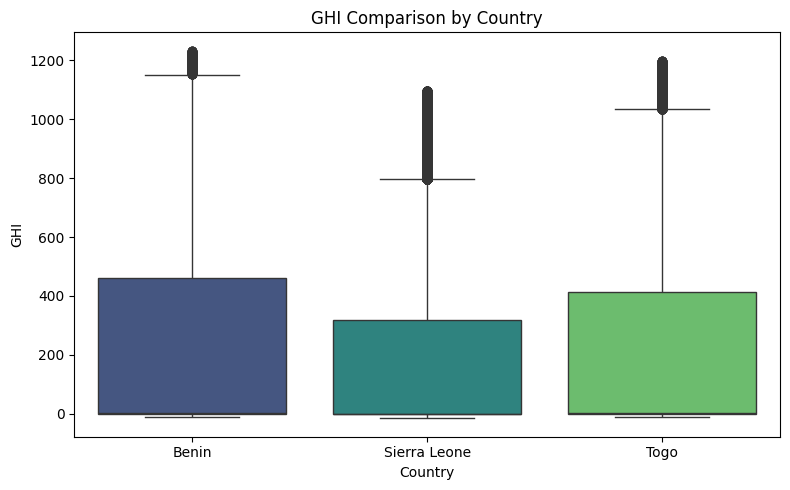

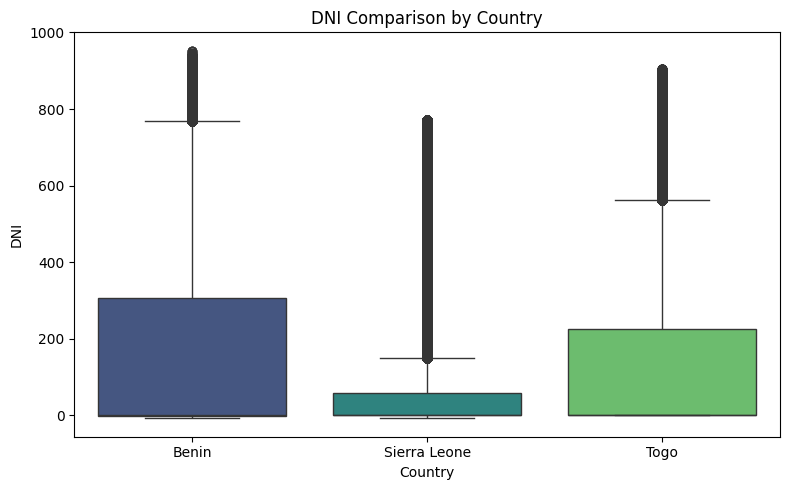

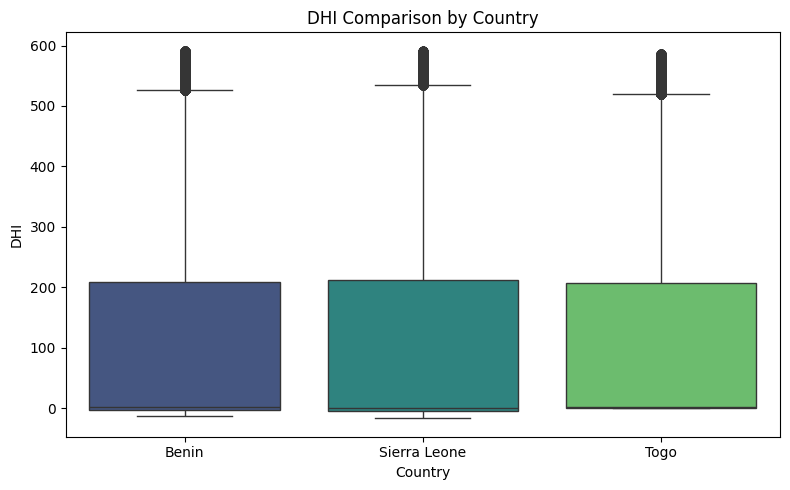

In [23]:
metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=df,hue='Country', palette="viridis")
    plt.title(f'{metric} Comparison by Country')
    plt.tight_layout()
    plt.show()

# Summary Table

In [15]:
summary = df.groupby("Country")[metrics].agg(['mean', 'median', 'std']).round(2)
summary

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         232.78    1.8  327.08  164.44   -0.1  260.92  110.04    1.6   
Sierra Leone  179.27    0.3  276.52  100.90   -0.1  198.64  104.75   -0.1   
Togo          219.96    2.1  315.85  145.37    0.0  246.26  110.84    2.5   

                      
                 std  
Country               
Benin         152.55  
Sierra Leone  152.45  
Togo          150.93

# Statistical Test

In [14]:
f_stat, p_val = stats.f_oneway(
    benin['GHI'].dropna(),
    sierra_leone['GHI'].dropna(),
    togo['GHI'].dropna()
)

print("ANOVA p-value:", round(p_val, 4))

ANOVA p-value: 0.0


# Key Observations

#

## 1. Extreme Variability in All Metrics

All countries show very high standard deviations (e.g., Benin’s GHI std=327.08, Togo’s DNI std=246.26), suggesting massive fluctuations in solar irradiance due to weather, seasons, or data anomalies.

DHI is slightly more stable (lower std) than GHI/DNI but still highly variable.

## 2. Suspicious Median Values Near Zero

Medians for DNI and DHI are close to 0 or negative (e.g., Sierra Leone’s DNI median = -0.1), which is physically implausible for solar irradiance. This hints at data errors or sensor issues.

## 3. Benin Leads in Mean GHI but with Highest Volatility

Benin has the highest mean GHI (232.78 W/m²) but also the highest std (327.08), making it a high-risk, high-reward location for solar farms.

Sierra Leone has the lowest mean irradiance but similar variability, indicating poor solar reliability.

# Visual Summary

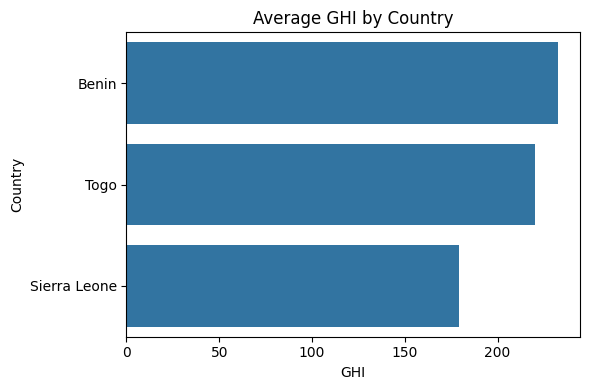

In [26]:
avg_ghi = df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index)
plt.title("Average GHI by Country")
plt.xlabel("GHI")
plt.tight_layout()
plt.show()